<a href="https://colab.research.google.com/github/Divya170399/IRIS-FLOWER-CLASSIFICATION/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#load libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
#load dataset
iris=pd.read_csv(r"/content/IRIS1.csv")

In [85]:
#show first two rows from dataset
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [86]:
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


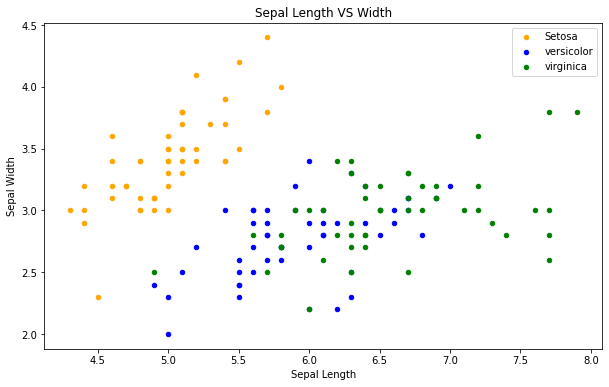

In [90]:
#Some Exploratory Data Analysis With Iris
fig = iris[iris.species=='Iris-setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
#****The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.****


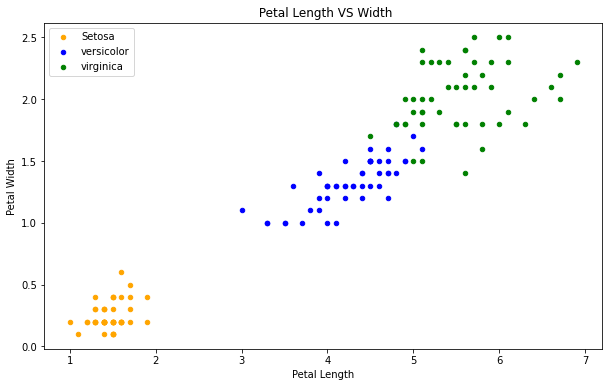

In [92]:
fig = iris[iris.species=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='Setosa')
iris[iris.species=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()
#****As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.****


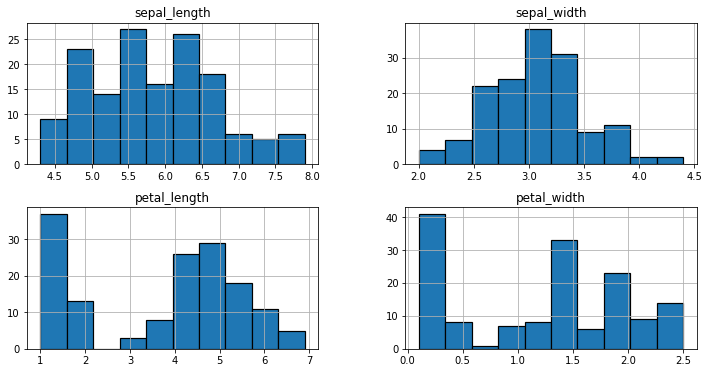

In [93]:
#Now let us see how are the length and width are distributed
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

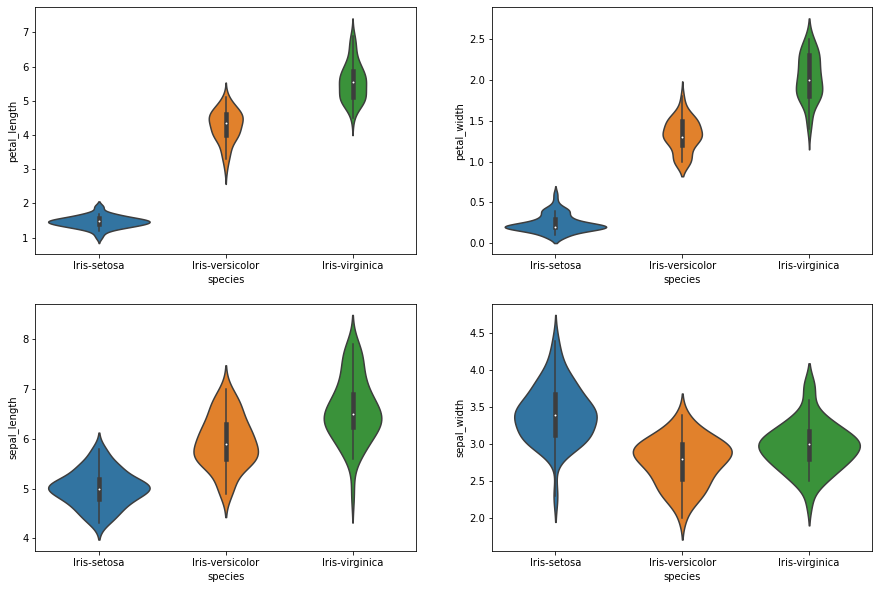

In [94]:
#Now let us see how the length and width vary according to the species
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)
#****The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density****

In [95]:
#MODELLING
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [96]:
#to get shape of the dataset
iris.shape
#****Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.****

(150, 5)

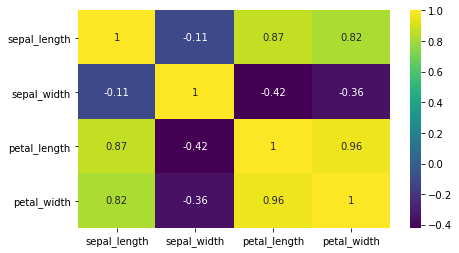

In [98]:
##draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='viridis')
plt.show()
#****Observation--->
#The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy. Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.
#Steps To Be followed When Applying an Algorithm.
#STEP 1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
#STEP 2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
#STEP 3. Then pass the training dataset to the algorithm to train it. We use the .fit() method
#STEP 4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
#STEP 5. We then check the accuracy by passing the predicted outcome and the actual output to the model.****

In [99]:
#Splitting The Data into Training And Testing Dataset
train, test = train_test_split(iris, test_size = 0.3) # in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [100]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]#taking the training data features
train_y=train.species #output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] #taking test data features
test_y =test.species   #output value of test data

In [101]:
#NOW LET US CHECK THE TRAIN AND TEST DATASET
train_X.head(2)
test_X.head(2)
train_y.head()

56     Iris-versicolor
117     Iris-virginica
138     Iris-virginica
35         Iris-setosa
41         Iris-setosa
Name: species, dtype: object

In [102]:
#SUPPORT VECTOR MACHINE (SVM)
model = svm.SVC()    #select the algorithm
model.fit(train_X,train_y)    # we train the algorithm with the training data and the training output
prediction=model.predict(test_X)    #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y)) 
#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


In [109]:
#LOGISTIC REGRESSION
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
#DECISION TREE
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9777777777777777


In [106]:
#K-NEAREST NEIGHBOURS
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9777777777777777


In [107]:
#Let's check the accuracy for various values of n for K-Nearest nerighbours
a_index=list(range(1,11))
a=pd.Series([],dtype=pd.StringDtype()) 

([<matplotlib.axis.XTick at 0x7f34ed770850>,
 <a list of 10 Text major ticklabel objects>)

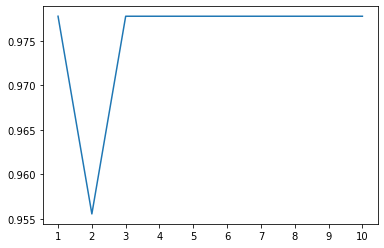

In [108]:
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)